# **Google Playstore Apps Rating Prediction**

## **1) Setup and Initialization**

In [1]:
# import data manipulation package:

import numpy as np
import pandas as pd

# import data visualization package

import matplotlib.pyplot as plt
import seaborn as sns

# supressing all the warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset:

df = pd.read_csv(r'F:\Coding\1) Internship - Unified Mentor\Project List\1) My Unified Mentor Projects\3) Google Playstore Apps rating Prediction\Upload\googleplaystore.csv')

## **2) Initial Data Analysis**

In [3]:
# Take a brief look at the data:

df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [5]:
# Get the dimensions of the DataFrame:

df.shape

(10841, 13)

In [6]:
# Get the row index of the datafreame:

df.index

RangeIndex(start=0, stop=10841, step=1)

In [7]:
# Get the column names of the Dataframe:

df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [8]:
# Check Datatype of each column:

df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [9]:
# Looking at the basic information of the dataframe:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


##### Since many features are stored as object types with suffixes, their data types need to be transformed into appropriate formats for effective analysis.

In [10]:
# Generate descriptive statistics for numerical columns

df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


##### Here, we have observed that the **Rating** column is the only one stored as a float, so the remaining numerical columns should be converted to the appropriate integer or float types.


## **3) Data Cleaning & Preprocessing**

In [11]:
# Looking for any Missing Values:

df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [12]:
# Look for % of missing value / Null Value:

df.isnull().sum()/df.shape[0]*100

App                0.000000
Category           0.000000
Rating            13.596532
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.009224
Price              0.000000
Content Rating     0.009224
Genres             0.000000
Last Updated       0.000000
Current Ver        0.073794
Android Ver        0.027673
dtype: float64

In [13]:
# Drop rows with missing Rating (target variable)

df2 = df.dropna(subset=['Rating'])  # Remove rows where Rating is null
df2.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [14]:
# Fill missing values for categorical columns
# Fill Type with most frequent value (ie Mode)

df2['Content Rating'].fillna(df2['Content Rating'].mode()[0], inplace=True)
df2['Android Ver'].fillna(df2['Android Ver'].mode()[0], inplace=True)

##### We use "mode()[0]" to fill missing values in the **Content Rating** column because this column contains a small set of repeating categories (such as *Everyone*, *Teen*, *Mature 17+*), and the most frequent one is a reasonable default when a value is missing. The `mode()` function returns the value that appears most often, and `[0]` simply selects the first result in case there is more than one mode. Filling missing entries with the most common content rating helps keep the dataset consistent without inventing unrealistic values, and it avoids losing rows by dropping them. This approach works well here because content ratings are stable, meaningful categories and are unlikely to vary randomly in a way that would distort the analysis.

In [15]:
# Fill Current Ver with 'Unknown'

df2['Current Ver'].fillna('Unknown', inplace=True)

##### The "Current Ver" column was filled with the label "Unknown" instead of using the mode()[0]. This is because version numbers are highly unique, not ordered, and not really comparable like normal categories. Since app versions change often, the most frequent version may only appear a few times and doesn’t represent a meaningful default. Using it would add noise and mislead the analysis. By assigning "Unknown," we keep the dataset consistent while still showing that some values were missing.

In [16]:
df2.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [17]:
# Clean and convert corrupted Installs column

# Remove '+' and ',' characters
df2['Installs'] = df2['Installs'].astype(str)  # makes the code re-runnable without errors
df2['Installs'] = df2['Installs'].str.replace(',', '', regex=False)
df2['Installs'] = df2['Installs'].str.replace('+', '', regex=False)

# Convert Installs to numeric (invalid values become NaN)
df2['Installs'] = pd.to_numeric(df2['Installs'], errors='coerce')

# Drop rows where Installs could not be converted
df2 = df2.dropna(subset='Installs')

# Convert to integer
df2['Installs'] = df2['Installs'].astype(int)

In [18]:
# Clean and convert Corrupted Reviews column

# Convert Reviews to numeric (invalid values become NaN)
df2['Reviews'] = pd.to_numeric(df2['Reviews'], errors='coerce')

# Drop rows where Reviews could not be converted
df2 = df2.dropna(subset='Reviews')

# Convert to integer
df2['Reviews'] = df2['Reviews'].astype(int)

In [19]:
# Clean and convert Price column

# Remove '$' character
df2['Price'] = df2['Price'].astype(str)  # makes the code re-runnable without errors
df2['Price'] = df2['Price'].str.replace('$', '', regex=False)

# Convert to float
df2['Price'] = df2['Price'].astype(float)

In [20]:
# Convert 'Size' to numeric (MB) - Convert 'k' to MB

def convert_size(size):
  # Step 1: Check if the value is missing (NaN or None).
  # If it's missing, return np.nan so the column stays consistent.
  if pd.isna(size):
    return np.nan

  # Step 2: Convert the value to a string.
  # This ensures we can safely check for 'M' or 'k' inside the text.
  size = str(size)

  # Step 3: If the string contains 'M' (megabytes),
  # remove the 'M' and convert the remaining number to float.
  if 'M' in size:
    return float(size.replace('M', ''))

  # Step 4: If the string contains 'k' (kilobytes),
  # remove the 'k', convert to float, then divide by 1024 to convert KB → MB.
  elif 'k' in size:
    return float(size.replace('k', '')) / 1024

  # Step 5: If the value doesn't match either case (like "Varies with device"),
  # return np.nan to mark it as missing/unusable.
  else:
    return np.nan


# apply the convert_size() function to every value in the 'Size' column of df2.
# This cleans and converts entries like "12M" → 12.0 MB, "512k" → 0.5 MB,
# and replaces invalid/missing values with NaN.
df2['Size'] = df2['Size'].apply(convert_size)

In [21]:
# Convert Size to numeric
df2['Size'] = pd.to_numeric(df2['Size'], errors='coerce')

# Fill missing values for categorical column with the Median value
df2['Size'] = df2['Size'].fillna(df2['Size'].median())

In [22]:
# Convert 'Last Updated' column to datetime datatype

df2['Last Updated'] = pd.to_datetime(df2['Last Updated'], errors='coerce')

In [23]:
# Check number of duplicate data

print('Total no of duplicate values =', df2.duplicated().sum())

Total no of duplicate values = 474


In [24]:
# Remove duplicate rows

df2 = df2.drop_duplicates()

In [25]:
# Check no of Duplicate rows after cleaning

print('Total no of duplicate values =', df2.duplicated().sum())

Total no of duplicate values = 0


In [26]:
# Check for invalid Rating values
# by Keeping only ratings between 1 and 5

df2 = df2[(df2['Rating'] >= 1) & (df2['Rating'] <= 5)]

In [27]:
# Final dataset overview

print(df2.shape)

print(df2.isnull().sum())

print(df2.info())

print(df2.describe())


(8892, 13)
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 8892 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             8892 non-null   object        
 1   Category        8892 non-null   object        
 2   Rating          8892 non-null   float64       
 3   Reviews         8892 non-null   int64         
 4   Size            8892 non-null   float64       
 5   Installs        8892 non-null   int64         
 6   Type            8892 non-null   object        
 7   Price           8892 non-null   float64       
 8   Content Rating  8892 non-null   object        
 9   Genres          8892 non-null   obje

In [28]:
# Save the cleaned DataFrame to CSV

# df2.to_csv('google_playstore_apps_rating_cleaned.csv', index=False)

## **4) Exploratory Data Analysis (EDA)**

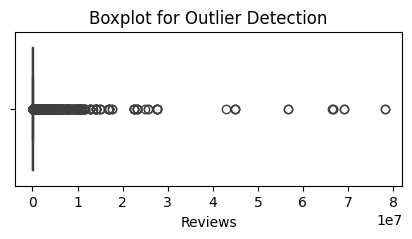

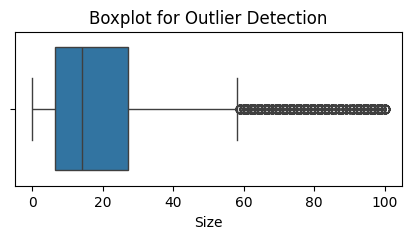

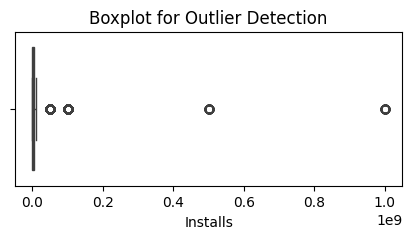

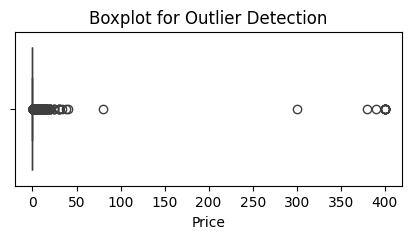

In [29]:
# Identifying Outliers

for col in ['Reviews', 'Size', 'Installs', 'Price']:
  plt.figure(figsize=(5,2))
  sns.boxplot(x=df2[col])
  plt.title('Boxplot for Outlier Detection')
  plt.show()

##### 1️⃣ Installs (Very large outliers up to 1B)
Should we remove them? ❌ NO

Why ?

These are real, popular apps (Google, YouTube, WhatsApp, etc.)

Removing them would:

*   Destroy real-world insights
*   Bias popularity analysis
*   Hurt rating prediction relevance

In [30]:
# Set plot style for better visuals

sns.set_style('whitegrid')

### **A) Univariate Analysis - App Rating distribution**

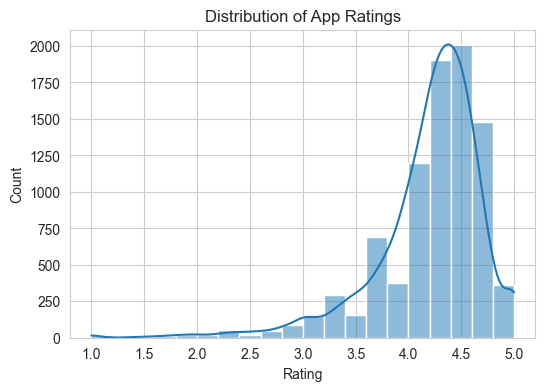

In [31]:
# Create a new figure for the plot
plt.figure(figsize=(6,4))

# Plot a histogram of app ratings with 20 bins and add a KDE curve
sns.histplot(df2['Rating'], bins=20, kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

**CHART INSIGHT:**

*   **High Average Rating:** The majority of apps on the Google Play Store have high ratings, with the average rating around 4.19 and the median at 4.3.
*   **Left-Skewed Distribution:** The distribution is heavily skewed towards higher ratings (4.0 to 5.0), indicating that most apps are well-received.
*   **Concentration at Higher End:** A significant portion of apps fall within the 4.0 to 4.5 range, suggesting a strong tendency for users to give positive feedback.

### **B) Top 10 Categories by Number of Apps**

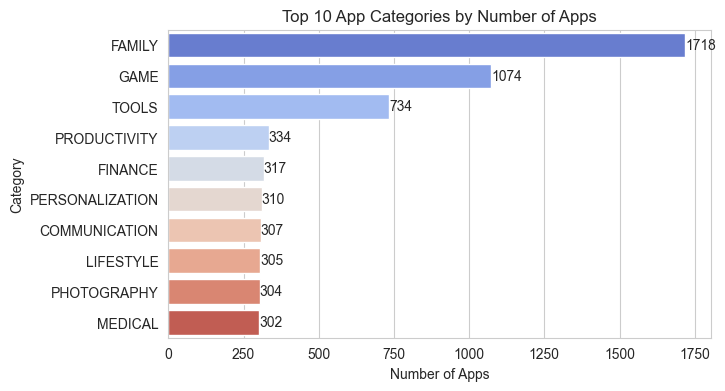

In [32]:
top_categories = df2['Category'].value_counts().head(10)

# Plot bar chart
plt.figure(figsize = (7,4))
ax = sns.barplot(x = top_categories.values, y = top_categories.index, palette='coolwarm')
plt.title('Top 10 App Categories by Number of Apps')
plt.xlabel('Number of Apps')
plt.ylabel('Category')

# Add Label to each bar
# Loop through each bar container in the plot
for container in ax.containers:
  # Add count labels at the edge of each bar
  ax.bar_label(container, label_type = 'edge')

plt.show()

**CHART INSIGHT:**

*   **Dominance of Family and Games:** **'FAMILY'** and **'GAME'** categories are significantly more popular, hosting the highest number of apps, indicating high demand and developer focus in these areas.
*   **Strong Demand for Utility Apps:** Categories like **'TOOLS', 'PRODUCTIVITY', and 'FINANCE'** also feature prominently in the top 10, highlighting a strong user need for practical and utility-oriented applications.
*   **Diverse App Ecosystem:** The presence of various categories such as **'PERSONALIZATION', 'COMMUNICATION', and 'LIFESTYLE'** in the top 10 shows the broad range of applications available and the diverse user needs being addressed on the Google Play Store.

### **C) Univariate Analysis - Free vs Paid apps**

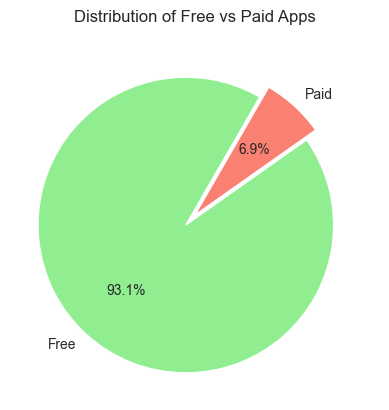

In [33]:
# Count Free and Paid apps
type_count = df2['Type'].value_counts()

# Plot pie chart
plt.figure()
plt.pie(type_count, labels=type_count.index,
        autopct='%1.1f%%',
        startangle=60,
        colors=['lightgreen','salmon'],
        explode=(0.09, 0))
plt.title('Distribution of Free vs Paid Apps')
plt.show()

**CHART INSIGHT:**

*   **Dominance of Free Apps:** The overwhelming majority of apps on the Google Play Store are free **(approximately 93.1%)**, indicating that developers primarily opt for a free-to-download model, likely relying on in-app purchases or advertising for revenue.
*   **Limited Paid App Market:** Paid apps constitute a small fraction **(around 6.9%)** of the total apps, suggesting a strong user preference for free content or a competitive market where charging upfront is less common.

### **D) Bivariate Analysis - Rating vs Reviews**

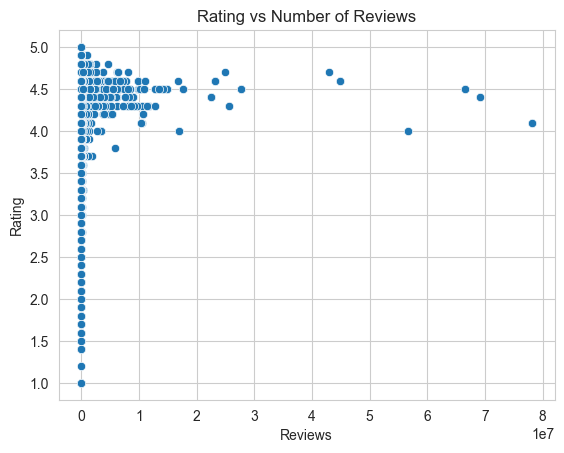

In [34]:
# Scatter plot for Rating vs Reviews
plt.figure()
sns.scatterplot(x='Reviews', y='Rating', data=df2)
plt.title('Rating vs Number of Reviews')
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.show()

**CHART INSIGHT:**

*   **Concentration at Higher Ratings:** Most apps, regardless of the number of reviews, tend to have ratings concentrated at the higher end (4.0 to 5.0). This indicates a general trend of positive user feedback on the platform.
*   **High Review Counts Vary in Rating:** Apps with a very high number of reviews show a broader range of ratings, but a significant portion of them still maintain high ratings. This suggests that popular apps (with many reviews) are generally well-regarded, but popularity alone does not guarantee a perfect 5-star rating.
*   **Weak Positive Correlation:** There is a weak positive correlation (Shown in correlation Heatmap chart) between the number of reviews and app ratings (correlation coefficient of approximately 0.069). This suggests that while apps with more reviews tend to have slightly higher ratings on average, the relationship is not very strong.

### **E) Category vs Average Rating**

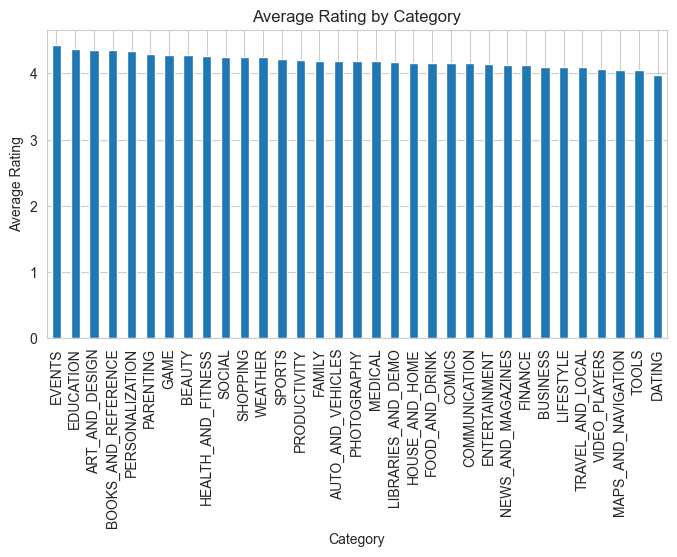

In [35]:
# Calculate average rating per category
avg_rating_category = df2.groupby('Category')['Rating'].mean().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(8,4))
avg_rating_category.plot(kind='bar')
plt.title('Average Rating by Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.show()

**CHART INSIGHT:**

*   **High Average Ratings Across the Board:** Most app categories maintain a high average rating, generally **above 4.0**, indicating overall user satisfaction across the Google Play Store.
*   **Top-Rated Niche Categories:** Categories like **'EVENTS', 'EDUCATION', and 'ART_AND_DESIGN'** consistently show some of the highest average ratings, suggesting users highly value apps in these more specialized niches.
*   **Consistent Performance:** There isn't a drastic difference in average ratings between most categories, implying that while some categories perform slightly better, quality is generally good across the board.

### **F) Correlation Analysis**

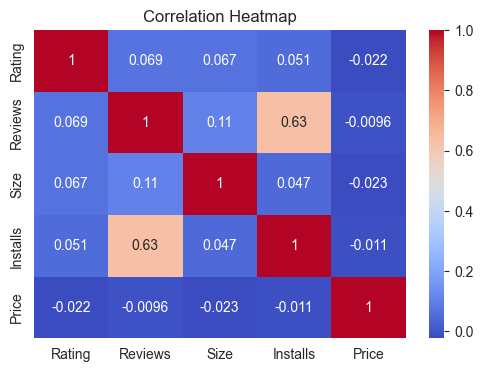

In [36]:
numeric_cols = ['Rating', 'Reviews', 'Size', 'Installs', 'Price']


# Compute correlation matrix
corr_matrix = df2[numeric_cols].corr()


# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**CHART INSIGHT:**

*   **Strong Positive Correlation between Reviews and Installs:** There is a significant positive correlation (0.63) between 'Reviews' and 'Installs'. This suggests that apps with a high number of installs tend to receive more reviews, and vice-versa, indicating popularity and user engagement go hand-in-hand.
*   **Weak Positive Correlation with Rating:** 'Rating' shows a very weak positive correlation with 'Reviews' (0.069), 'Size' (0.067), and 'Installs' (0.051). This indicates that while highly-rated apps might have slightly more reviews, larger sizes, or more installs, these factors are not strong predictors of a high rating.
*   **Weak Negative Correlation with Price:** 'Rating', 'Reviews', 'Size', and 'Installs' all show a weak negative correlation with 'Price'. This implies that higher-priced apps do not necessarily translate to higher ratings, more reviews, or more installs, and might even be slightly associated with lower values for these metrics.

### **G) Top Genres by Install Count**

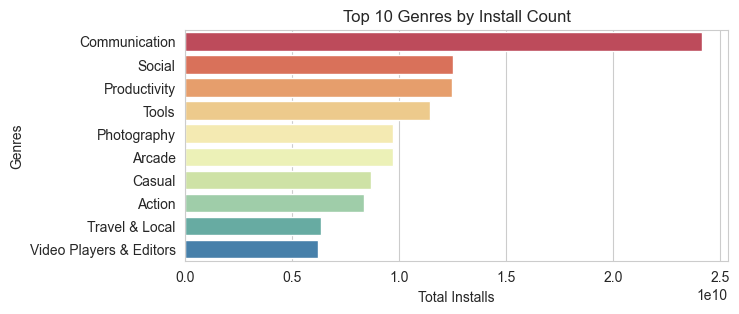

In [37]:
plt.figure(figsize=(7,3))
top_genres_installs = df2.groupby('Genres')['Installs'].sum().sort_values(ascending=False).head(10)

sns.barplot(x=top_genres_installs.values,
            y=top_genres_installs.index,
            palette='Spectral')

plt.title('Top 10 Genres by Install Count')
plt.xlabel('Total Installs')
plt.ylabel('Genres')
plt.show()

**CHART INSIGHT:**

*   **Dominance of Communication and Social Genres:** The 'Communication' genre leads significantly in total installs, followed closely by 'Social'. This indicates that apps facilitating connection and interaction are extremely popular on the Google Play Store.
*   **High Demand for Utility Apps:** Genres like 'Tools', 'Photography', and 'Productivity' also show very high install counts, highlighting a strong user need for practical utilities, photo/video editing, and efficiency-boosting applications.
*   **Diverse User Needs Reflected:** The top genres cover a broad range of user interests, from staying connected (Communication, Social) and managing daily tasks (Tools, Productivity) to entertainment (Video Players & Editors), demonstrating the varied demands of the Google Play Store audience.

### **H) Relationship Between Price and Rating**

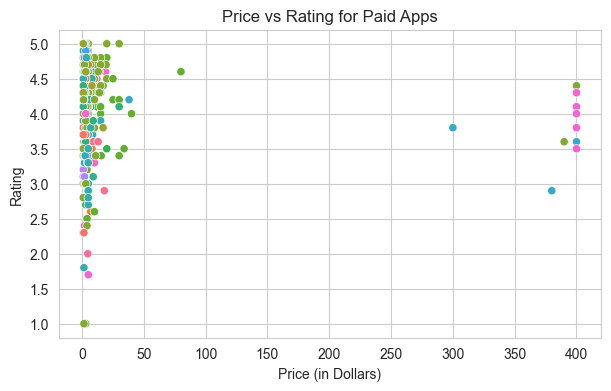

In [44]:
paid_apps = df2[df2['Type'] == 'Paid']
plt.figure(figsize=(7,4))
sns.scatterplot(x='Price', y='Rating', data=paid_apps, hue='Category', legend=False)
plt.title('Price vs Rating for Paid Apps')
plt.xlabel('Price (in Dollars)')
plt.ylabel('Rating')
plt.show()

**CHART INSIGHT:**

*   **Majority of Paid Apps are Low-Priced:** Most paid applications are priced at a relatively low cost, typically under \$50 dollars. This suggests that developers price their apps competitively low to attract a wider user base.
*   **High-Priced Apps are Rare:** There are very few apps with prices exceeding 50 dollars and even fewer above 200 dollars. This indicates a niche market for very expensive applications, which might be specialized tools or enterprise-level.
*   **No Direct Correlation Between Price and Rating:** The scatter plot shows no clear positive correlation between an app's price and its rating. Both low-priced and high-priced apps exhibit a wide range of ratings, with most concentrating in the 4.0-5.0 range. This implies that users rate apps based on their utility and quality rather than their price tag.

## **5) Code for MySQL**

In [45]:
# install pymysql sqlalchemy

!pip install pymysql sqlalchemy
from sqlalchemy import create_engine


[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
# Connect to MySQL

from sqlalchemy import create_engine

username = 'root'
password = 'admin7subrata1989'
host = 'localhost'
port = '3306'
database = 'playstore_app_rating_project'

engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}")

In [47]:
# Load DataFrame to MySQL

table_name = 'playstore_app_data'
df2.to_sql(table_name, engine, if_exists = 'replace', index=False)

print(f"Data successfully loaded into table '{table_name}' in database '{database}'.")

Data successfully loaded into table 'playstore_app_data' in database 'playstore_app_rating_project'.


In [49]:
# Read back sample

pd.read_sql("SELECT * FROM playstore_app_data LIMIT 5", engine)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
